In [26]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
np.random.seed(seed=0)

from keras.utils import to_categorical

#ignore the annoying warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import sys

print(sys.version)

3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]


In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 67s 0us/step


In [6]:
X_test.shape

(10000, 32, 32, 3)

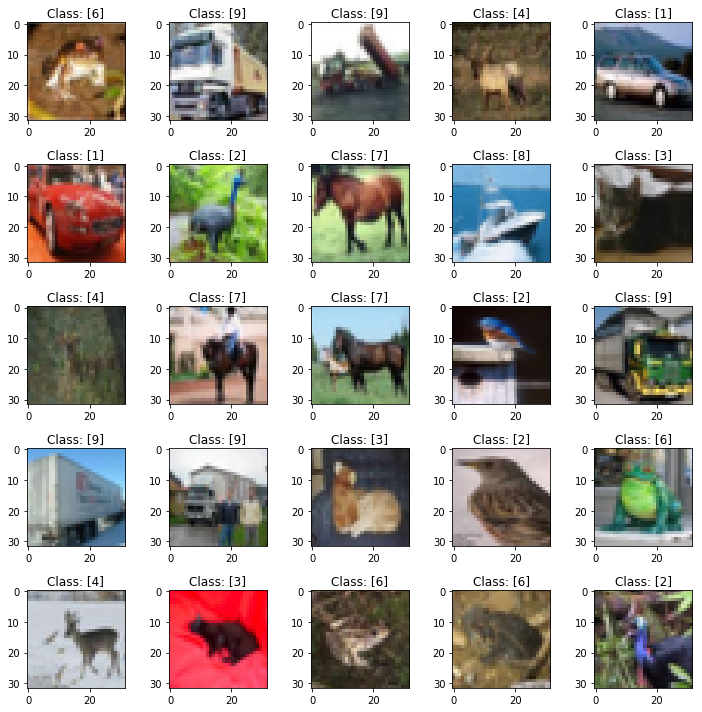

In [7]:
plt.figure(figsize=(10,10))

for idx in range(25):
    plt.subplot(5, 5, idx+1)
    plt.imshow(X_train[idx])
    plt.title('Class: {}'.format(y_train[idx]))
    
plt.tight_layout()

In [10]:
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

img_channels = 3

X_train = X_train.reshape(-1, img_rows, img_cols, img_channels)
X_test = X_test.reshape(-1, img_rows, img_cols, img_channels)

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [12]:
if np.max(X_train) > 1:
    X_train = X_train / 255
    
if np.max(X_test) > 1:
    X_test = X_test / 255

TypeError: unhashable type: 'numpy.ndarray'

In [23]:
#num_classes = 10 
#len(set(y_train))

if len(y_train.shape) == 2:
    y_train = y_train.reshape(-1)
    y_test = y_test.reshape(-1)
    num_classes = len(set(y_train))

if len(y_train.shape) == 1:
    y_train = to_categorical(y_train, num_classes) 

if len(y_test.shape) == 1:
   y_test = to_categorical(y_test, num_classes) 

In [24]:
y_train.shape, y_test.shape

((50000, 10), (10000, 10))

In [27]:
input_shape = (img_rows, img_cols, img_channels)

model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    
    Flatten(),
    
    Dense(1014, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')

])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
__________

In [28]:
model.fit(
    X_train, y_train,
    batch_size=256,
    epochs=2,
    verbose=2,
    validation_data=(X_test, y_test)
)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/2
 - 47s - loss: 1.6965 - acc: 0.3824 - val_loss: 1.4109 - val_acc: 0.5049
Epoch 2/2
 - 45s - loss: 1.3321 - acc: 0.5234 - val_loss: 1.1988 - val_acc: 0.5835


In [11]:
score = model.evaluate(X_test,y_test)

10000/10000 [==============================] - 4s 381us/step


In [12]:
score

[0.04065114059909684, 0.9892]